# SMAI Assignment - 2

## Question 4: Multi-layer Perceptrons

### Digit Classification

In this question, you will perform digit classification using MLP. You can use the MLPClassifier from sklearn. Train and two test sets have been provided [here](https://drive.google.com/drive/folders/1OUVrOMp2jSSBDJSqvEyXDFTrhiyZnqit?usp=sharing). Report the accuracy and any other interesting observations.

In [2]:
import numpy as np
import h5py
from sklearn.preprocessing import StandardScaler

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
filename = "/content/drive/MyDrive/training_3digits.hdf5"
train = h5py.File(filename,'r')
train_images = np.array(train['images'])
train_digits = np.array(train['digits'])
train.close()

In [5]:
filename = "/content/drive/MyDrive/testing_3digits_part1.hdf5"
test1 = h5py.File(filename,'r')
test_images_1 = np.array(test1['images'])
test_digits_1 = np.array(test1['digits'])
test1.close()

In [6]:
filename = "/content/drive/MyDrive/testing_3digits_part2.hdf5"
test2 = h5py.File(filename,'r')
test_images_2 = np.array(test2['images'])
test_digits_2 = np.array(test2['digits'])
test2.close()

In [7]:
from sklearn import neural_network as nn

flattened_train_images = train_images.reshape(train_images.shape[0], -1)

# Initialize MLP classifier
mlp = nn.MLPClassifier(hidden_layer_sizes=(40,30,10),max_iter=1000,solver='sgd',alpha=1e-4,learning_rate_init=0.01)
# train_images.shape

mlp.fit(flattened_train_images,train_digits)

MLPClassifier(hidden_layer_sizes=(40, 30, 10), learning_rate_init=0.01,
              max_iter=1000, solver='sgd')

In [8]:
from sklearn.metrics import accuracy_score
flattened_test_images_1 = test_images_1.reshape(test_images_1.shape[0], -1)
predictions_1 = mlp.predict(flattened_test_images_1)
print(accuracy_score(test_digits_1,predictions_1)*100)

100.0


In [9]:
flattened_test_images_2 = test_images_2.reshape(test_images_2.shape[0],-1)
predictions_2 = mlp.predict(flattened_test_images_2)
print(accuracy_score(test_digits_2,predictions_2)*100)

0.0


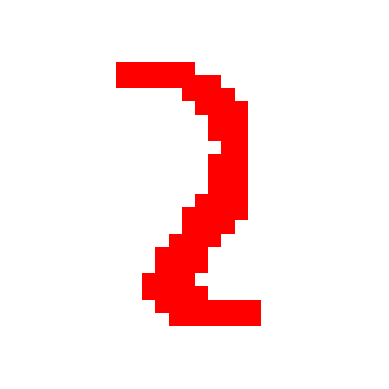

In [11]:
import matplotlib.pyplot as plt
plt.imshow(test_images_1[0])
plt.axis('off')  # Hide axis
plt.show()

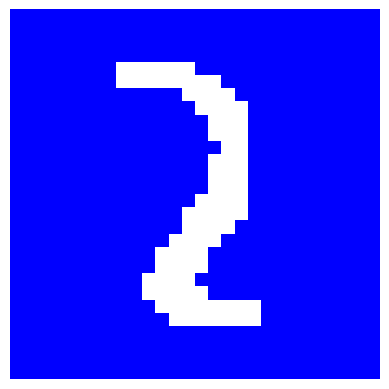

In [12]:
plt.imshow(test_images_2[0])
plt.axis('off')  # Hide axis
plt.show()

# Observation:
* Got an accuracy of 100% over first test dataset and an accuracy and an accuracy of 0% over second test dataset.
* Here if we clearly see the sample images of test_1 and test_2 the images of test_1 are having similiar pattern to train while test_2 are inverse of test_1.
* It signifies that the model is trying to learn some shortcuts to classify the digits and not completely learning the digits.
* So it is unable to generalize and predict the digits.
